In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
import tqdm

In [2]:
catogory_json = Path("keywords/reverse_keywords_category.json")
with open(catogory_json, 'r') as f:
    catogory_dict = json.load(f)
key_words_json = Path("keywords/keywords_category.json")
with open(key_words_json, 'r') as f:
    key_words_dict = json.load(f)
all_catogories = list(key_words_dict.keys())
all_catogories.sort()

# Count the number of words (averaged by number of company)

In [47]:
result_dir = Path("result")
years = list(range(2006, 2024))
n_quarters = 4
time_labels_list = []
for year in tqdm.tqdm(years):
    year_dir = result_dir / str(year)
    for i in range(n_quarters):
        quarter = i + 1
        quarter_dir = year_dir / f"QTR{quarter}"
        result_json_files = list(quarter_dir.glob("*.json"))
        time_labels_list.append(f"{year}Q{quarter}")
        all_word_count = {}
        for rjf in result_json_files:
            with open(rjf, 'r') as f:
                data = json.load(f)
                for word in data:
                    if word in all_word_count:
                        all_word_count[word] += data[word]
                    else:
                        all_word_count[word] = data[word]
        all_word_count = dict(sorted(all_word_count.items(), key=lambda item: item[1], reverse=True))
        
        # divided by number of documents
        for word in all_word_count:
            all_word_count[word] /= len(result_json_files)
        
        with open(year_dir / f"{year}QTR{quarter}.json", 'w') as f:
            json.dump(all_word_count, f)
            

100%|██████████| 18/18 [01:58<00:00,  6.59s/it]


In [4]:
if "total_words" not in all_catogories:
    all_catogories.append("total_words")
    
for year in tqdm.tqdm(years):
    year_dir = result_dir / str(year)
    year_catogory_info = {}
    for c in all_catogories:
        year_catogory_info[c] = 0
    for i in range(n_quarters):
        quarter = i + 1
        qtr_summary_json = year_dir / f"{year}QTR{quarter}.json"
        with open(qtr_summary_json, 'r') as f:
            data = json.load(f)
        catogory_info = {}
        for c in all_catogories:
            catogory_info[c] = 0
        for word in data:
            if word in catogory_dict:
                word_catogories = catogory_dict[word]
                catogory_info[word_catogories] += data[word]
        catogory_info["total_words"] = data["total_words"]
        catogory_info = dict(sorted(catogory_info.items(), key=lambda item: item[1], reverse=True))
        with open(year_dir / f"{year}QTR{quarter}_catogory.json", 'w') as f:
            json.dump(catogory_info, f)
        for c in all_catogories:
            year_catogory_info[c] += catogory_info[c]
    year_catogory_info = dict(sorted(year_catogory_info.items(), key=lambda item: item[1], reverse=True))
    for c in all_catogories:
        year_catogory_info[c] /= n_quarters
    with open(year_dir / f"{year}_catogory.json", 'w') as f:
        json.dump(year_catogory_info, f)

100%|██████████| 18/18 [00:00<00:00, 205.29it/s]


# Count the frequency of words (averaged by number of company)

In [3]:
result_dir = Path("result")
result_dir.mkdir(exist_ok=True)

years = list(range(2006, 2024))
n_quarters = 4
time_labels_list = []
for year in tqdm.tqdm(years):
    year_dir = result_dir / str(year)
    for i in range(n_quarters):
        quarter = i + 1
        quarter_dir = year_dir / f"QTR{quarter}"
        result_json_files = list(quarter_dir.glob("*.json"))
        time_labels_list.append(f"{year}Q{quarter}")
        all_word_count = {}
        for rjf in result_json_files:
            with open(rjf, 'r') as f:
                data = json.load(f)
                for word in data:
                    if word in all_word_count:
                        all_word_count[word] += data[word] / data["total_words"]
                    else:
                        all_word_count[word] = data[word] / data["total_words"]
        all_word_count = dict(sorted(all_word_count.items(), key=lambda item: item[1], reverse=True))
        
        # divided by number of documents
        for word in all_word_count:
            all_word_count[word] /= len(result_json_files)
        
        with open(year_dir / f"{year}QTR{quarter}.freq.json", 'w') as f:
            json.dump(all_word_count, f)
            

100%|██████████| 18/18 [02:07<00:00,  7.11s/it]


In [5]:
if "total_words" not in all_catogories:
    all_catogories.append("total_words")
    
for year in tqdm.tqdm(years):
    year_dir = result_dir / str(year)
    year_catogory_info = {}
    for c in all_catogories:
        year_catogory_info[c] = 0
    for i in range(n_quarters):
        quarter = i + 1
        qtr_summary_json = year_dir / f"{year}QTR{quarter}.freq.json"
        with open(qtr_summary_json, 'r') as f:
            data = json.load(f)
        catogory_info = {}
        for c in all_catogories:
            catogory_info[c] = 0
        for word in data:
            if word in catogory_dict:
                word_catogories = catogory_dict[word]
                catogory_info[word_catogories] += data[word]
        catogory_info["total_words"] = data["total_words"]
        catogory_info = dict(sorted(catogory_info.items(), key=lambda item: item[1], reverse=True))
        with open(year_dir / f"{year}QTR{quarter}_catogory.freq.json", 'w') as f:
            json.dump(catogory_info, f)
        for c in all_catogories:
            year_catogory_info[c] += catogory_info[c]
    year_catogory_info = dict(sorted(year_catogory_info.items(), key=lambda item: item[1], reverse=True))
    for c in all_catogories:
        year_catogory_info[c] /= n_quarters
    with open(year_dir / f"{year}_catogory.freq.json", 'w') as f:
        json.dump(year_catogory_info, f)

100%|██████████| 18/18 [00:00<00:00, 206.41it/s]


# Plot average number of words

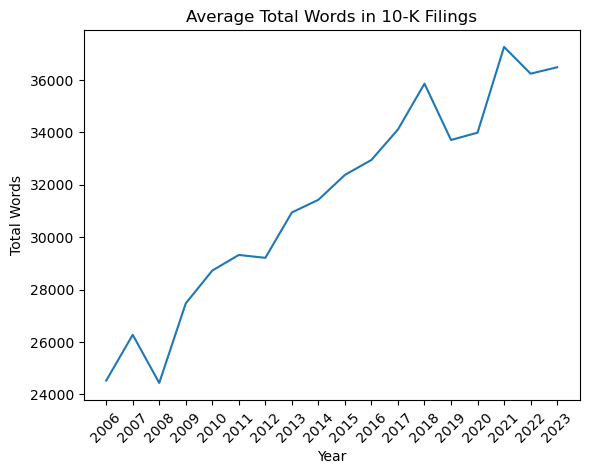

In [12]:
all_catogories.sort()

plt.figure()
X = []
Y = []
for year in years:
    year_dir = result_dir / str(year)
    with open(year_dir / f"{year}_catogory.json", 'r') as f:
        data = json.load(f)
    X.append(year)
    Y.append(data["total_words"])
# plt.xticks(X)
# set tick labels
plt.xticks(X, X, rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Words")
plt.title("Average Total Words in 10-K Filings")
plt.plot(X, Y, label="total_words")
plt.savefig(result_dir / "total_words.png")

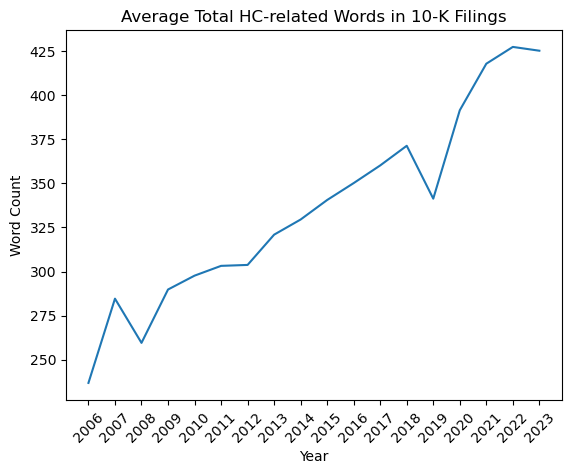

In [28]:
# plot the number of HC related keywords count over the years
plt.figure()
X = []
Y = []
for year in years:
    year_dir = result_dir / str(year)
    with open(year_dir / f"{year}_catogory.json", 'r') as f:
        data = json.load(f)
        del data["total_words"]
    X.append(year)
    Y.append(np.sum([data[c] for c in all_catogories if c in data]))
# plt.xticks(X)
# set tick labels
plt.xticks(X, X, rotation=45)
plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Average Total HC-related Words in 10-K Filings")
plt.plot(X, Y, label="total_HC_words")
plt.savefig(result_dir / "total_HC_words.png")


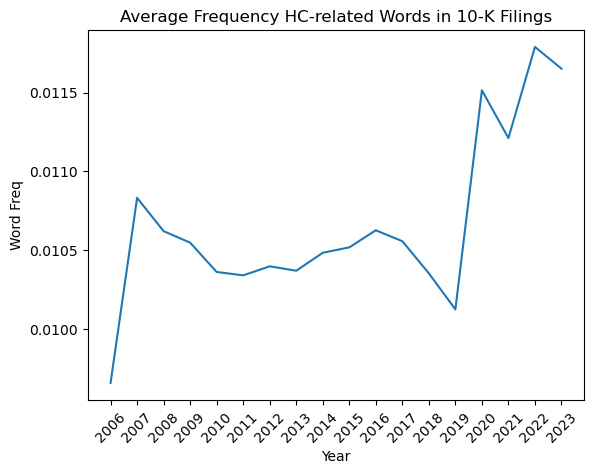

In [31]:
# plot the number of HC related keywords count over the years
plt.figure()
X = []
Y = []
for year in years:
    year_dir = result_dir / str(year)
    with open(year_dir / f"{year}_catogory.json", 'r') as f:
        data = json.load(f)
        total_words = data["total_words"]
        del data["total_words"]
    X.append(year)
    Y.append(np.sum([data[c]/total_words for c in all_catogories if c in data]))
# plt.xticks(X)
# set tick labels
plt.xticks(X, X, rotation=45)
plt.xlabel("Year")
plt.ylabel("Word Freq")
plt.title("Average Frequency HC-related Words in 10-K Filings")
plt.plot(X, Y, label="total_HC_words")
plt.savefig(result_dir / "total_HC_words.freq.png")


<Figure size 640x480 with 0 Axes>

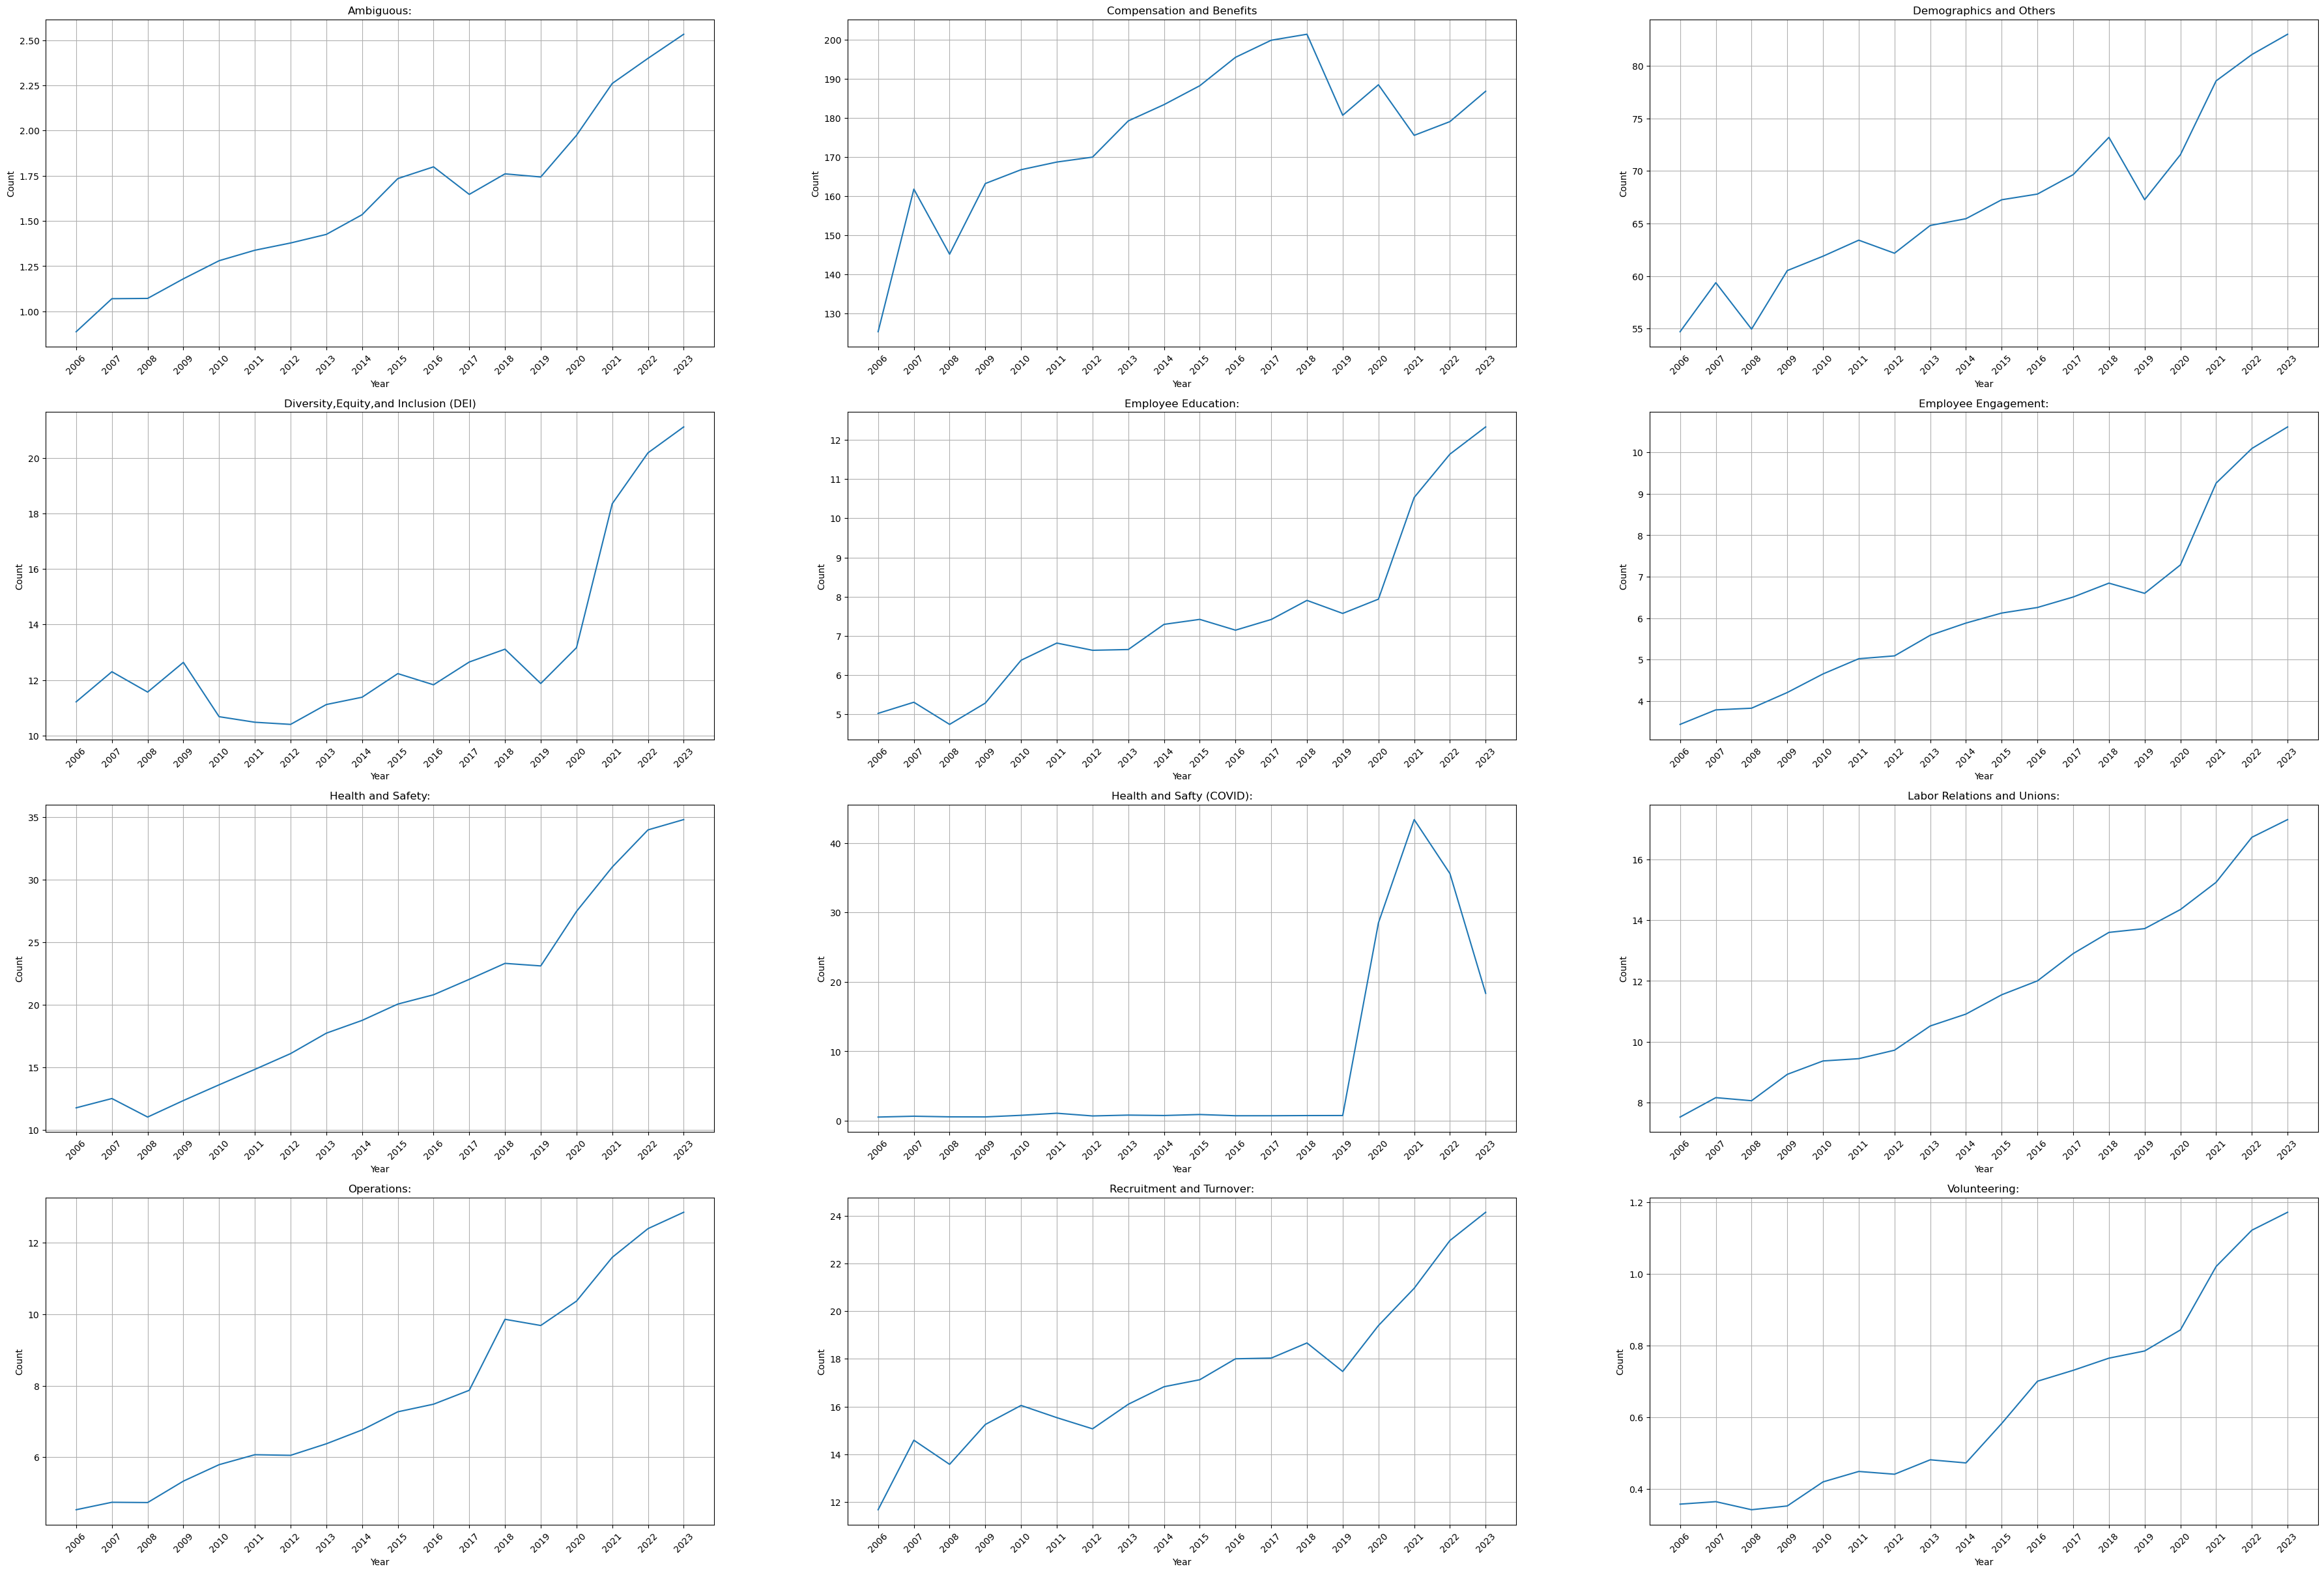

In [13]:
# plot the result over years by subplots
all_catogories.sort()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
fig, axs = plt.subplots(4, 3, figsize=(45, 30))

plotting_catogories = [x for x in all_catogories if x != "total_words"]
for i, c in enumerate(plotting_catogories):
    row = i // 3
    col = i % 3
    catogory_count = []
    for year in years:
        year_dir = result_dir / str(year)
        with open(year_dir / f"{year}_catogory.json", 'r') as f:
            data = json.load(f)
            catogory_count.append(data[c])
    ax = axs[row, col]
    ax.plot(years, catogory_count)
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)
    ax.set_title(c)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.grid()

plt.savefig(result_dir / "catogory_count.png")


<Figure size 640x480 with 0 Axes>

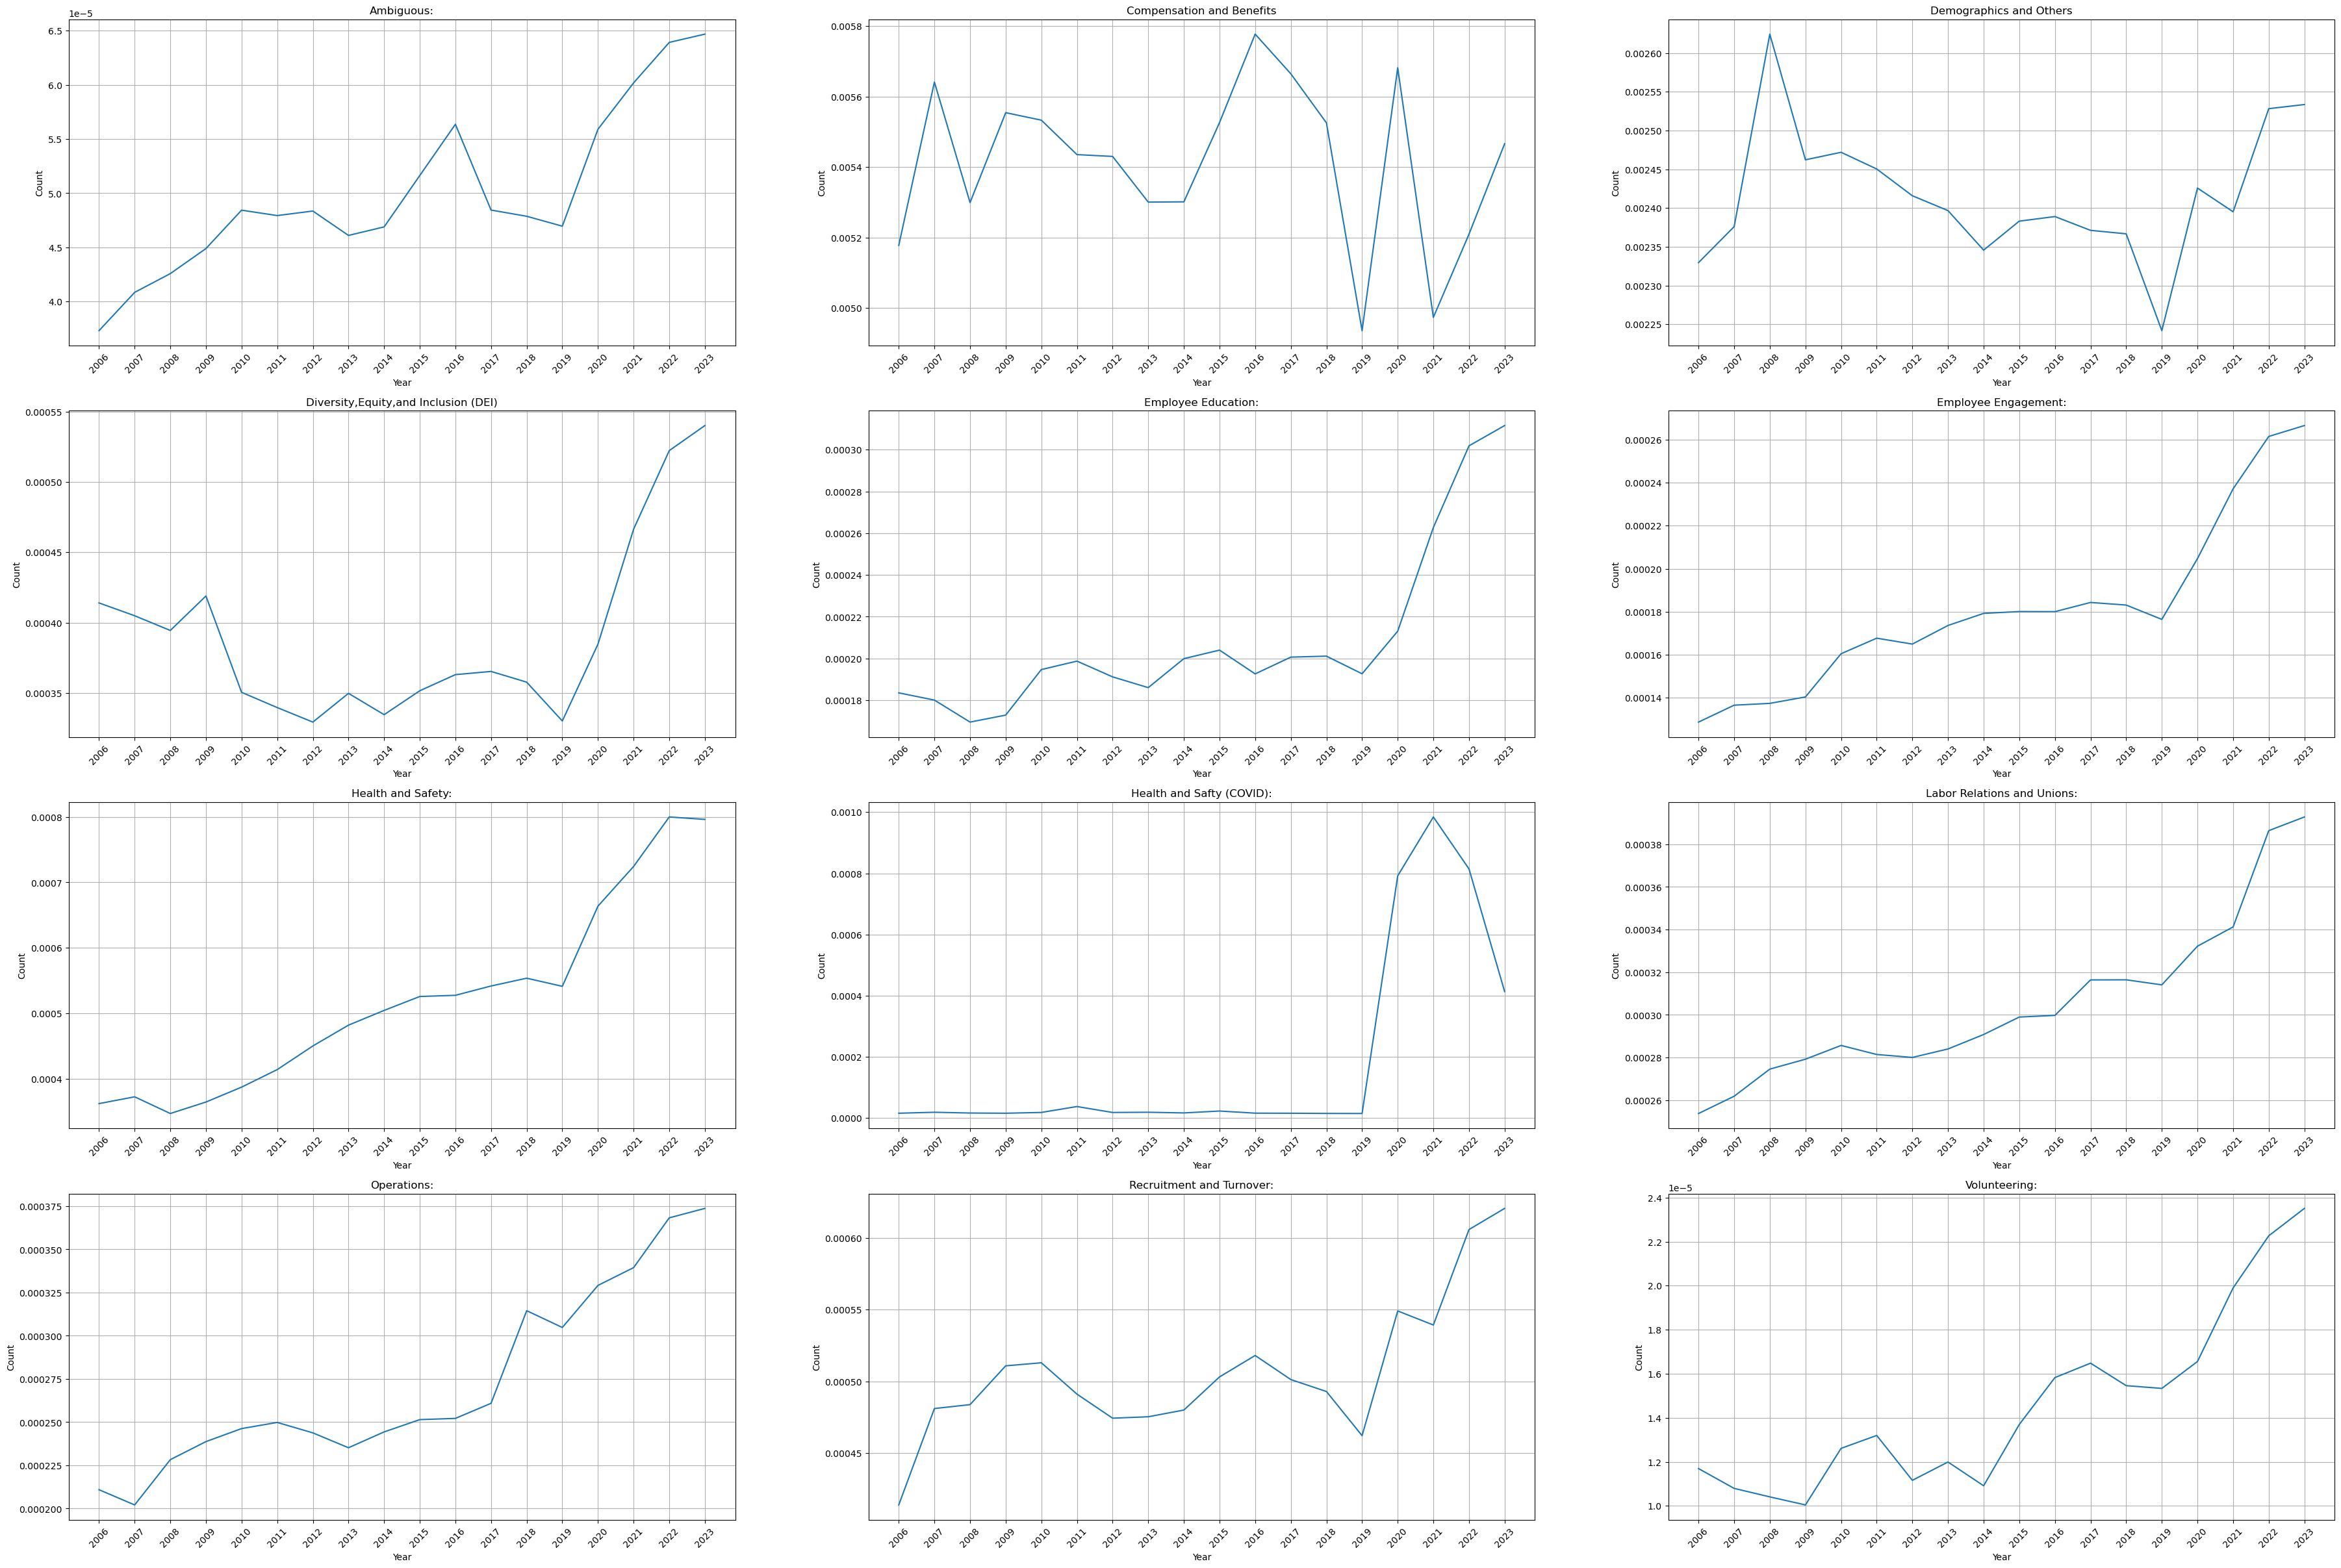

In [14]:
# plot the result over years by subplots
all_catogories.sort()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
fig, axs = plt.subplots(4, 3, figsize=(45, 30))

plotting_catogories = [x for x in all_catogories if x != "total_words"]
for i, c in enumerate(plotting_catogories):
    row = i // 3
    col = i % 3
    catogory_count = []
    for year in years:
        year_dir = result_dir / str(year)
        with open(year_dir / f"{year}_catogory.freq.json", 'r') as f:
            data = json.load(f)
            catogory_count.append(data[c])
    ax = axs[row, col]
    ax.plot(years, catogory_count)
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)
    ax.set_title(c)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.grid()

plt.savefig(result_dir / "catogory_count.freq.png")


# plot bar plots over years

/var/folders/bq/4bnf3xp16m5b6w2st777ww2r0000gp/T/ipykernel_3645/406197168.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.keys(), rotation=-45, ha="left")
/var/folders/bq/4bnf3xp16m5b6w2st777ww2r0000gp/T/ipykernel_3645/406197168.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.keys(), rotation=-45, ha="left")
/var/folders/bq/4bnf3xp16m5b6w2st777ww2r0000gp/T/ipykernel_3645/406197168.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.keys(), rotation=-45, ha="left")
/var/folders/bq/4bnf3xp16m5b6w2st777ww2r0000gp/T/ipykernel_3645/406197168.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

<Figure size 640x480 with 0 Axes>

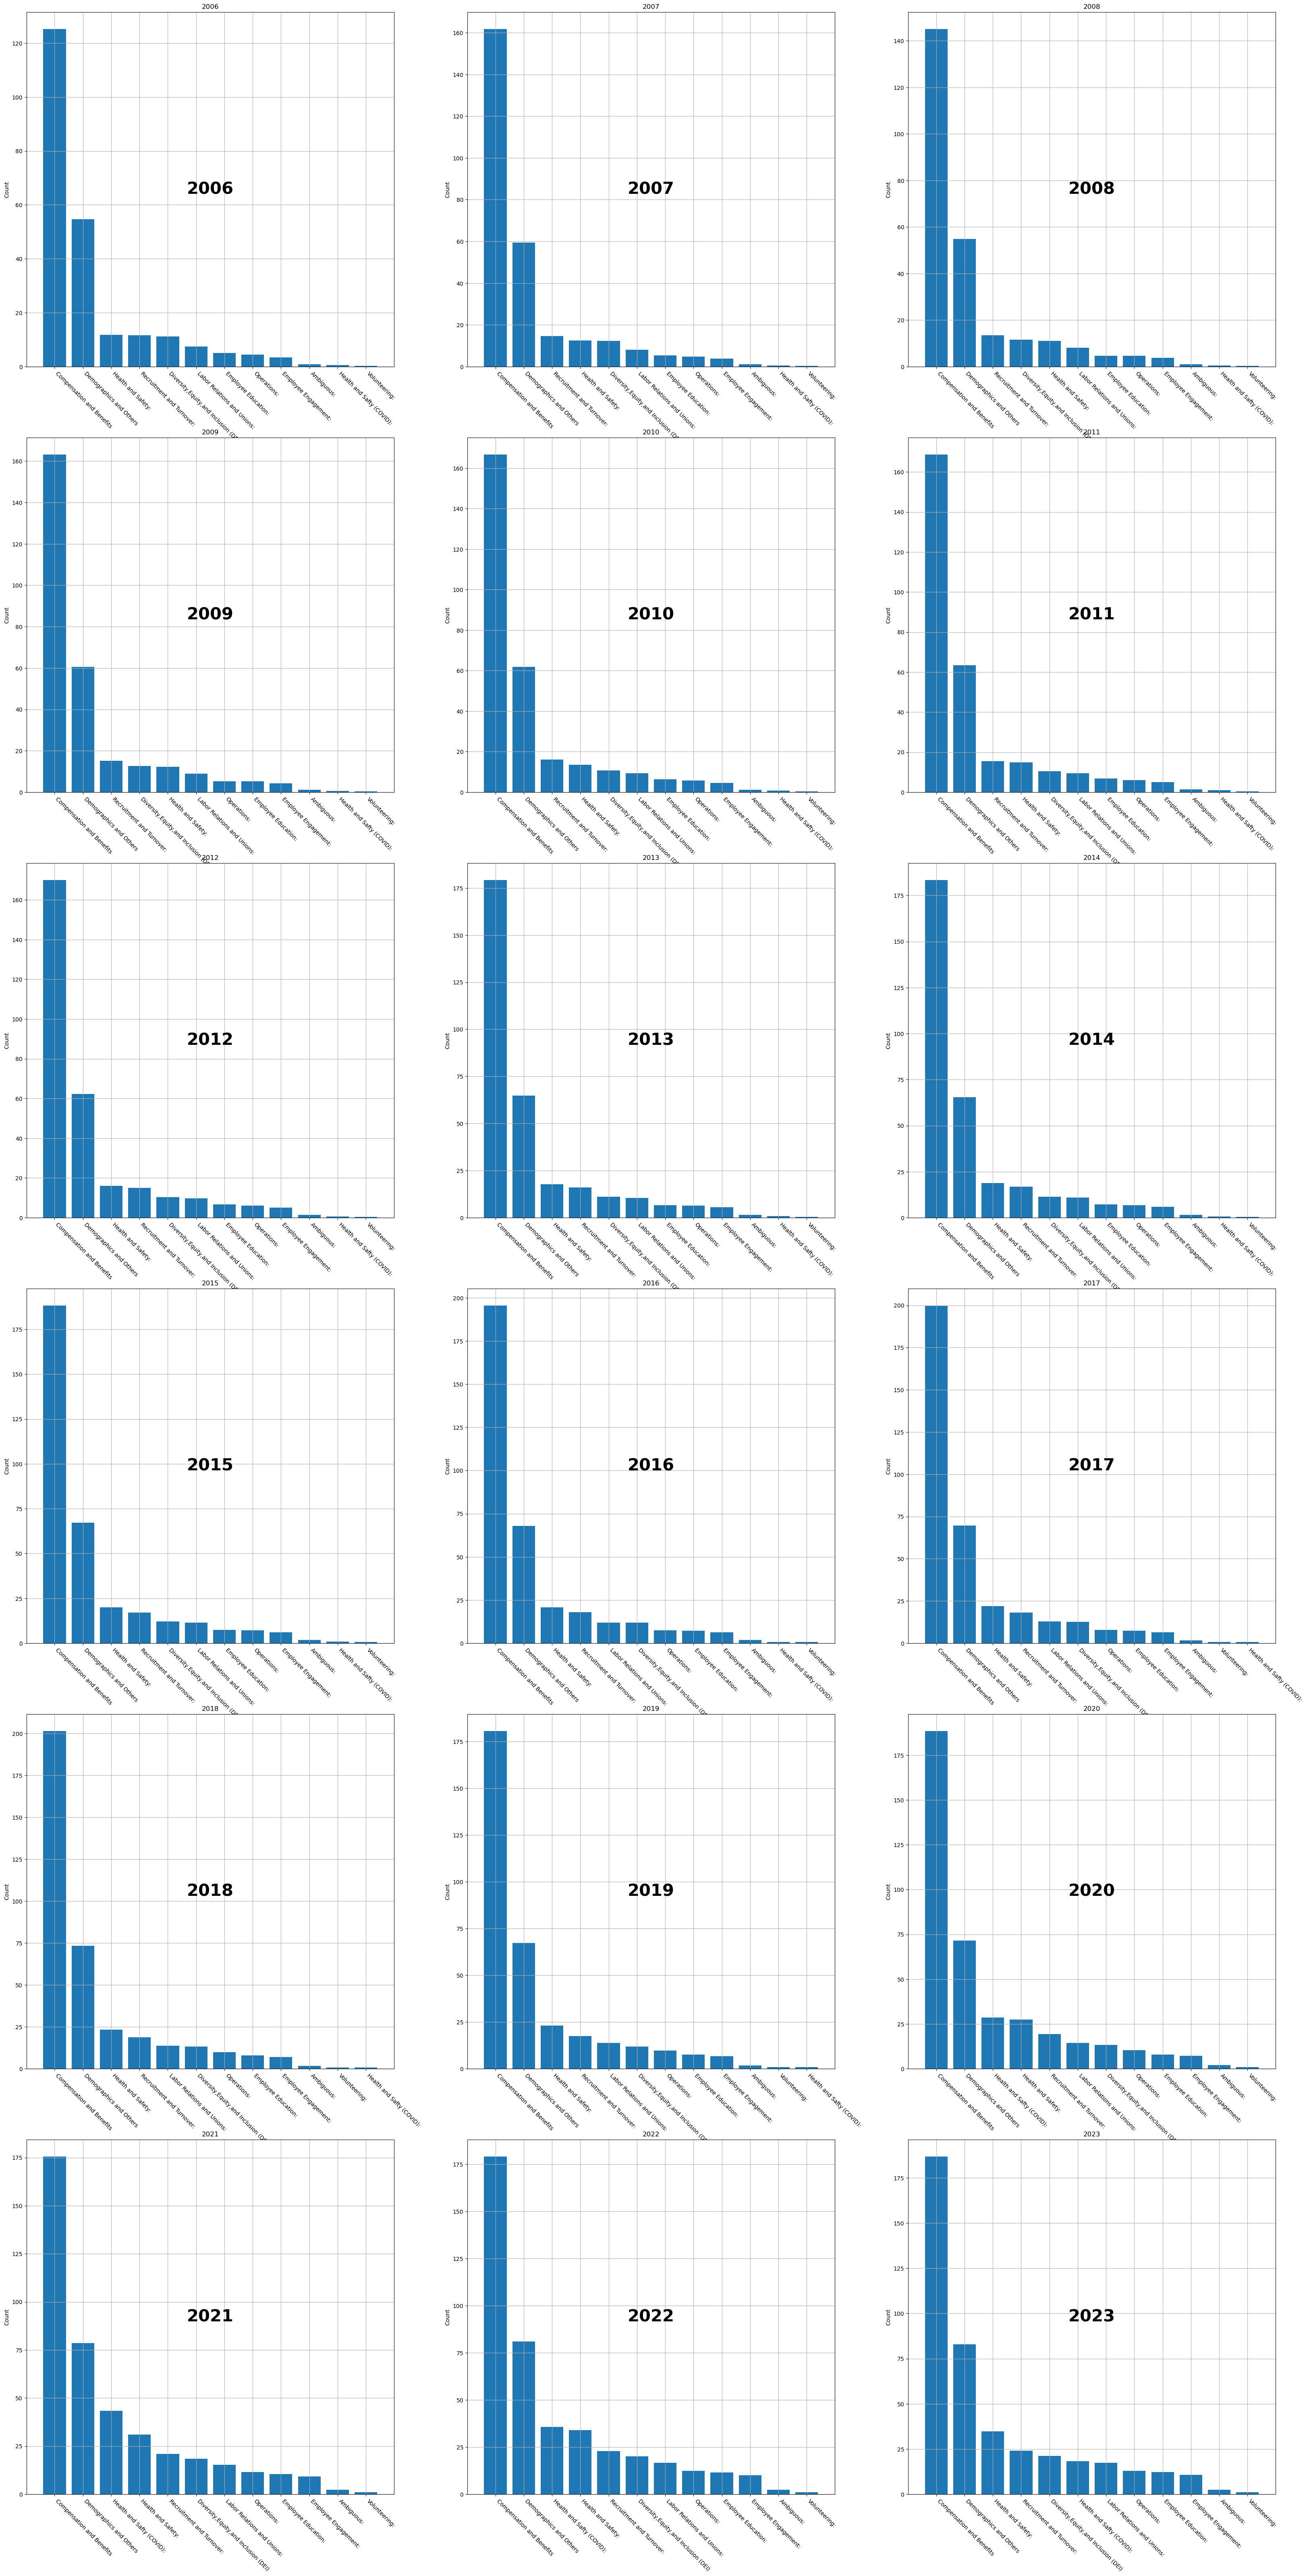

In [29]:
# plot bar plots of each year by subplots

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
fig, axs = plt.subplots(6, 3, figsize=(40, 80))

plotting_catogories = [x for x in all_catogories if x != "total_words"]

for i, y in enumerate(years):
    year_dir = result_dir / str(y)
    with open(year_dir / f"{y}_catogory.json", 'r') as f:
        data = json.load(f)
    del data["total_words"]
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.bar(data.keys(), data.values())
    ax.set_title(f"{y}")
    ax.set_xticklabels(data.keys(), rotation=-45, ha="left")
    # write year in the middle of the plot, with big font and bold
    ax.text(0.5, 0.5, f"{y}", ha='center', va='center', transform=ax.transAxes, fontsize=30, fontweight='bold')
    ax.set_ylabel("Count")
    ax.grid()

plt.savefig(result_dir / "yearly_catogory_count.png")